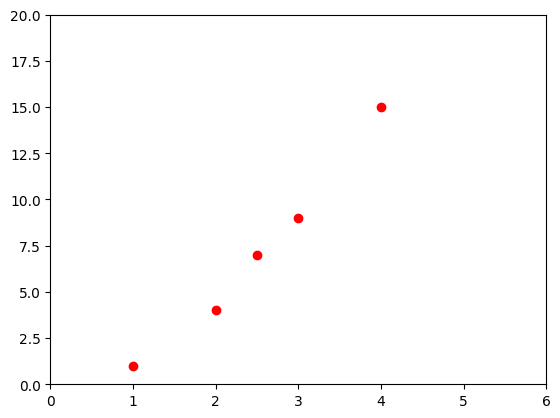

In [32]:
import matplotlib.pyplot as plt         ##visualization
import numpy as np        
import tensorflow as tf 
import pandas as pd         ##data analysis
from IPython.display import clear_output
from urllib.parse import urlencode
from six.moves import urllib

from six.moves import urllib

x=[1, 2, 2.5, 3, 4]
y=[1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

"""We can see that this data has a linear coorespondence. When the x value increases, so does the y. Because o
relation we can create a line of best fit for this dataset. In this example our line will only use one input variable
working with two dimensions. In larger datasets with more features our line will have more features and input
"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship betwe
points. (https:/www.investopedia.com/terms/line-of-best-fit.asp)
Here's a refresher on the eqaution of a line in 2D.
y= ma +b"""

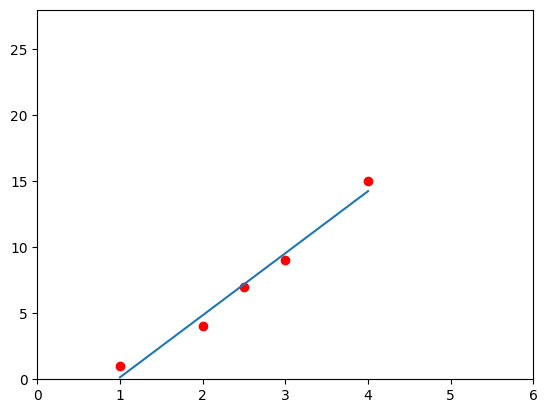

In [34]:
##Here's an example of a ling of best fit for this graph.
plt.plot (x, y, 'ro')
plt.axis([0, 6, 0, 28])
plt.plot (np.unique (x), np.poly1d (np. polyfit (x, y, 1)) (np. unique (x)))
plt.show()

##Data
"""So if you haven't realized by now a major part of machine learning is data! In fact it's so important that most of what we do in this tutorial will
focus on exploring, cleaning and selecting appropriate data.
The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. Our first step is
always to understand the data and explore it. So let's do that!
Below we will load a dataset and learn how we can explore it using some built-in tools."""

In [36]:
# Load dataset.
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop ('survived')
y_eval = dfeval.pop ('survived')
##you removed survived column, The reason we need to do that is we need to separate the data we're going to be classifying from the data that is
##kind of our input information or an initial dataset


##so why do you think L.REgression is good for this data set 
"""
examples:
1-if someone is a female so she has ahigher survival rate
2-if someone is a younger he has higher survival rate
3-no.of siblings doesnt matter 
4-the deck place always matters
5-embark_to is where they are going
6-if someone is alone makes a difference i think


"""

'\nexamples:\n1-if someone is a female so she has ahigher survival rate\n2-if someone is a younger he has higher survival rate\n3-no.of siblings doesnt matter \n4-the deck place always matters\n5-embark_to is where they are going\n6-if someone is alone makes a difference i think\n\n\n'

In [37]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [38]:
print(dftrain.loc[0],y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [39]:
#And if we want a more statistical analysis of our data we can use the .describe () method.
dftrain. describe ()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [40]:
#And since we talked so much about shapes in the previous tutorial let's have a look at that too!
dftrain.shape

(627, 9)

"""Notice that each entry is either a 0 or 1. Can you guess which stands for survival?
And now because visuals are always valuable let's generate a few graphs of the data."""

<AxesSubplot:>

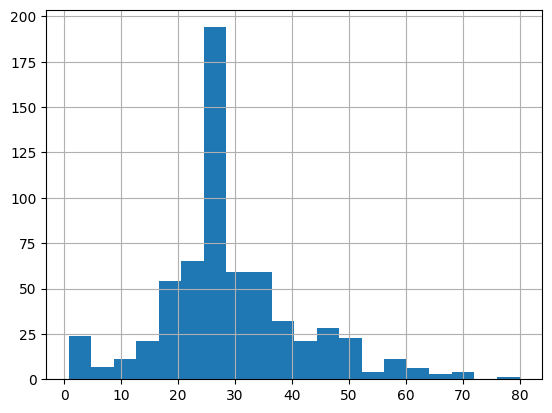

In [42]:
dftrain.age. hist (bins=20)


<AxesSubplot:>

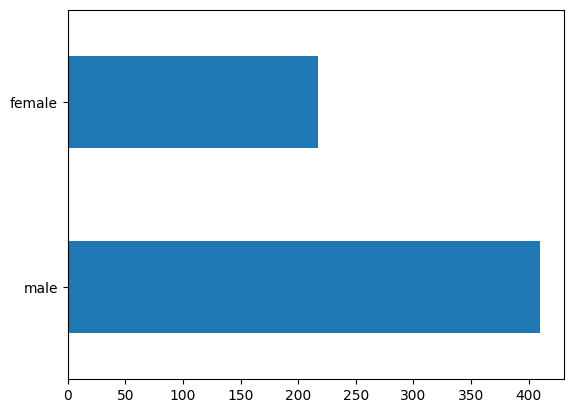

In [43]:
dftrain.sex.value_counts().plot(kind="barh")


<AxesSubplot:>

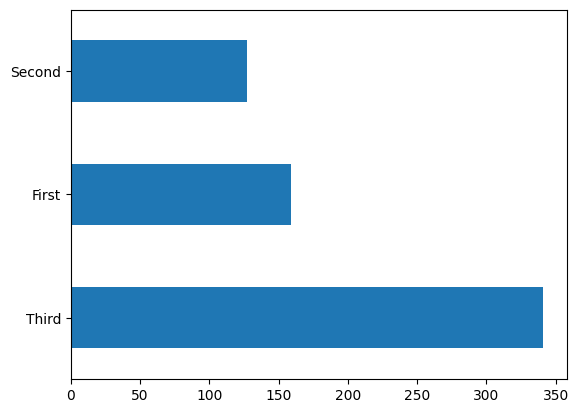

In [44]:
dftrain['class' ] .value_counts(). plot (kind='barh')


Text(0.5, 0, '% survive')

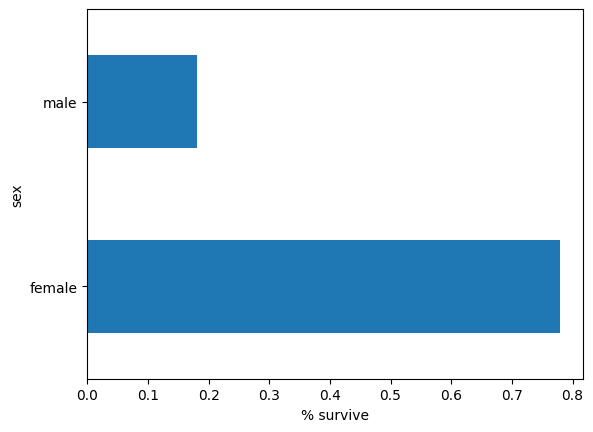

In [45]:
pd.concat ([dftrain, y_train], axis=1).groupby("sex") . survived . mean () .plot (kind= 'barh') . set_xlabel("% survive")


##so
""" 
After analyzing this information we should notice the following:
The majority of passengers are in their 20's or 30's
The majority of passengers are male
The majority of passengers are in the Third class
Females have a much higher chance of survival

"""

##Training vs Testing Data
"""You may have noticed that we loaded two different datasets above. This is because when we train models we need two sets of data:
training and testing.
The training data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.
The testing data is what we use to evaluate the model and see how well it is performing. We must use a separate set of data that the model
has not been trained on to evaluate it. Can you think of why this is?
Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model
on the data that it has already seen we cannot measure its accuracy accurately. We can't be sure that the model hasn't simply memorized our
training data. This is why we need our testing and training data to be separate."""

In [48]:
from tkinter import NUMERIC


CATEGORICAL_COLUMNS =['sex', 'n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS =['age','fare']

In [49]:
feature_columns=[]      ##what we need to feed to our linear model
for feature_name in CATEGORICAL_COLUMNS:
    vocabulry = dftrain[feature_name].unique()      ##gets a list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulry))    
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))    

In [50]:
dftrain['sex'].unique()



array(['male', 'female'], dtype=object)

In [51]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [52]:
dftrain['embark_town'].unique()


array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [53]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

##The Training Process
"""So we are almost done preparing our dataset and feel as though it's a good time to explain how our model is trained. Specifically how input
data is fed to our model.
For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our
model at once, but simply small batches of entries. We will actually feed these batches to our model multiple times according to the number
of epochs.
An ~epoch~ is simply one stream of our entire dataset. The number of epochs we define is the amountof times our nodel will see the entire
dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.
define is the amount of times our model will see the entire
Ex. if we have 10 ephocs, our model will see the same dataset 10 times.
Since we need to feed our data in batches and multiple times we need to create something called an input function. The input function
simply defines how our dataset will be converted into batches at each epoch.
بنتكلم انك هتعد تفيد الموديل كزا مرة بكزا طريقة 
"""

##Input Function
"""The TensorfFlow model we are going to use requires that the data we pass it comes in as a [tf.data.Dataset] object. This means we must
create a input function that can convert our current pandas dataframe into that object.
Below you'll see a seemingly complicated input function, this iš straight from the TensorFlow documentation
(https://www.tensorfiow.org/tutorials/estimator/linear). Ive commented as much as I can to make it understandble, but you may want to
refer to the documentation for a detailed explination of each method.

input function: the way that we define how our data is going to be broken into epochs and batches t be fed ton our model.
"""

In [56]:
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle=True, batch_size=32) :        #batch size is how many elemnts are going to give to our data moel per epoch
    def input_function(): # inner function, this will be returned
        ds= tf.data.Dataset .from_tensor_slices ((dict(data_df), label_df))       #create tf.data.Dataset object with data and its label_df
        if shuffle:
            ds= ds.shuffle (1000) # randomize(shuffle) order of data
        ds= ds.batch (batch_size).repeat (num_epochs) # split dataset into batches of 32 and repeat process for number of epochs
        return ds # return a batch of the dataset
    return input_function # return a function object for use
train_input_fn = make_input_fn(dftrain, y_train) #here we will call the input_ function that was returned to us to get a dataset object we can feed to the model 
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)      #1 epoch and no shuffle cus we're not trainning it    

In [57]:
###Creating the Model
"""In this tutorial we are going to use a linear estimator to utilize the linear regression algorithm.
Creating one is actually pretty easy! Have a look below"""

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
#we've just created a linear estimator by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\GAMING~1\\AppData\\Local\\Temp\\tmpbgc4ydae', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
###Training the model 
""" 
training the model is as easy as passing the input functions we created earlier
"""

linear_est.train(train_input_fn)    #train
result= linear_est.evaluate(eval_input_fn)  #gt model metrics/stats by testing on the testing data
clear_output()      #clears consoked output
result['accuracy']   #the result is a dict stats about our model

0.7689394

In [64]:
print(result['accuracy'])   #the result is a dict stats about our model
print(result)



0.7689394
{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.834925, 'auc_precision_recall': 0.78153276, 'average_loss': 0.49114782, 'label/mean': 0.375, 'loss': 0.48040453, 'precision': 0.7375, 'prediction/mean': 0.30442116, 'recall': 0.5959596, 'global_step': 400}


""" 
the accuracy changes every time you run the input fn bec it shuffles the data that it trains with   
so to get the best accuracy try:
inc or dec the no of epochs
"""



لغاية دلوقتي انتا لسا ما استعملتش الموديل ب عملته
الموديلز بتاعة تينسور من الافضل استخدامها في توقع كزا حاجة مع بعض مش كويسة اوي في توقع حجات فردية
كمان الافضل فالداتا الكبيرة جدا
الاكيوريسي بتيجي من المقارنة بين الارقام الحقيقية والارقام اللي الموديا توقعها 


In [67]:
result= list(linear_est.predict(eval_input_fn))        #inside prediction pass the inpuut function we used for the evaluation
""" حطها فليست عشان تلوب جواها """


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\GAMING~1\AppData\Local\Temp\tmpbgc4ydae\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


' حطها فليست عشان تلوب جواها '

In [68]:
result  #all the predection

[{'logits': array([-3.2597642], dtype=float32),
  'logistic': array([0.0369776], dtype=float32),
  'probabilities': array([0.9630224, 0.0369776], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.5204084], dtype=float32),
  'logistic': array([0.17940138], dtype=float32),
  'probabilities': array([0.8205986 , 0.17940138], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.08096121], dtype=float32),
  'logistic': array([0.47977072], dtype=float32),
  'probabilities': array([0.5202292 , 0.47977072], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},


In [69]:
result[0]   #the 1st prediction

{'logits': array([-3.2597642], dtype=float32),
 'logistic': array([0.0369776], dtype=float32),
 'probabilities': array([0.9630224, 0.0369776], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [72]:
""" انا عايز احتمال النجاه  بتاع اول شخص"""
print(result[0]['probabilities'])
## 4% survival rate and 96% for not survivng 
result[0]['probabilities'][1]   # 1 is represents survived so thats the chance of not surviving

[0.9630224 0.0369776]


0.036977604

In [75]:
""" 
نتا في السيل اللي فاتت اتعاملت ارقام بس انتا عايز بقا الحقيقة
"""

print(dfeval.loc[2])   ##thats the info of the 3rd passenger 
y_eval.loc[3]           #the prediction for this person

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object


1